<a href="https://colab.research.google.com/github/ricopahlevi/Data-Mining/blob/main/UAS_DATA_MINING_ACHMAD_KHAIRICO_PAHLEVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [26]:
# Load & Read Dataset
df = pd.read_csv('/content/Smartphones_cleaned_dataset.csv')
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [27]:
# Buat Label Kategori Harga
def label_price(price):
    if price < 15000:
        return 'Low'
    elif price < 30000:
        return 'Medium'
    else:
        return 'High'

df['price_category'] = df['price'].apply(label_price)

# Drop kolom yang tidak diperlukan
df_model = df.drop(columns=['model', 'price'])

In [28]:
# Encode Data Kategorikal
categorical_cols = df_model.select_dtypes(include=['object', 'bool']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le


In [29]:
# Isi nilai kosong dengan median
df_model.fillna(df_model.median(numeric_only=True), inplace=True)

# Pisahkan fitur dan label
X = df_model.drop(columns=['price_category'])
y = df_model['price_category']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Latih Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nKlasifikasi Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8367346938775511

Klasifikasi Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        66
           1       0.84      0.91      0.87        67
           2       0.75      0.73      0.74        63

    accuracy                           0.84       196
   macro avg       0.84      0.83      0.83       196
weighted avg       0.84      0.84      0.84       196



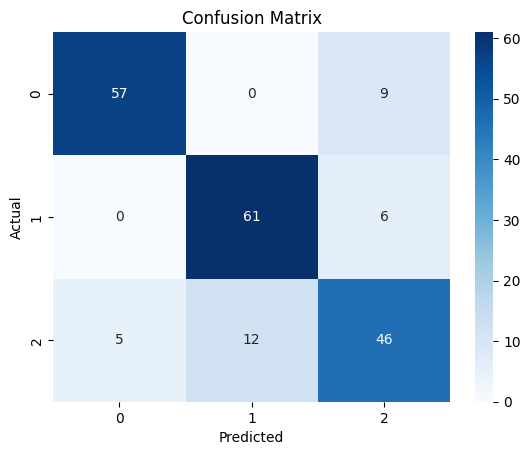

In [30]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

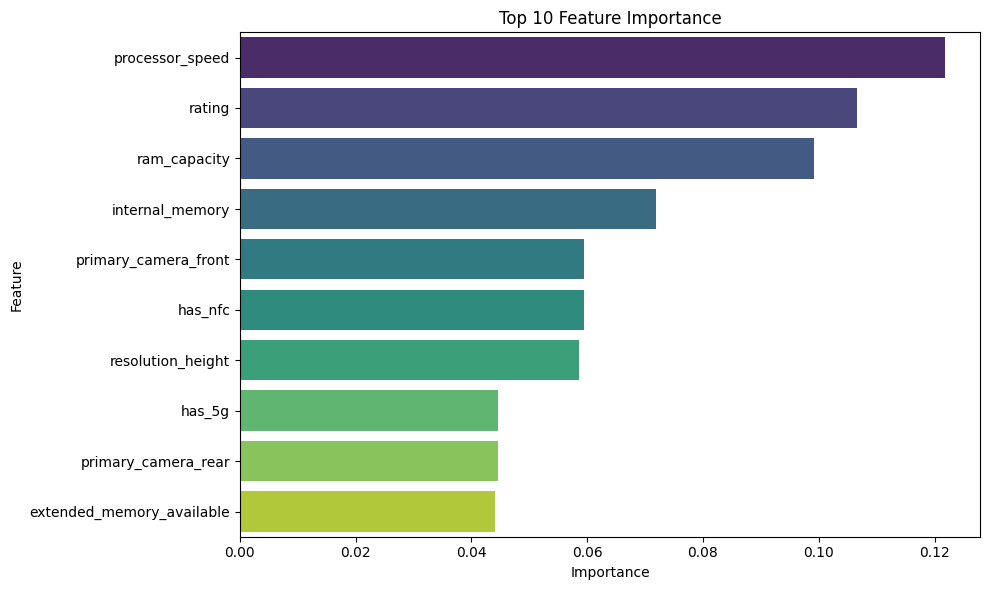

In [31]:
# Visualisasi Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=np.array(feature_names)[indices][:10], palette='viridis')
plt.title("Top 10 Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

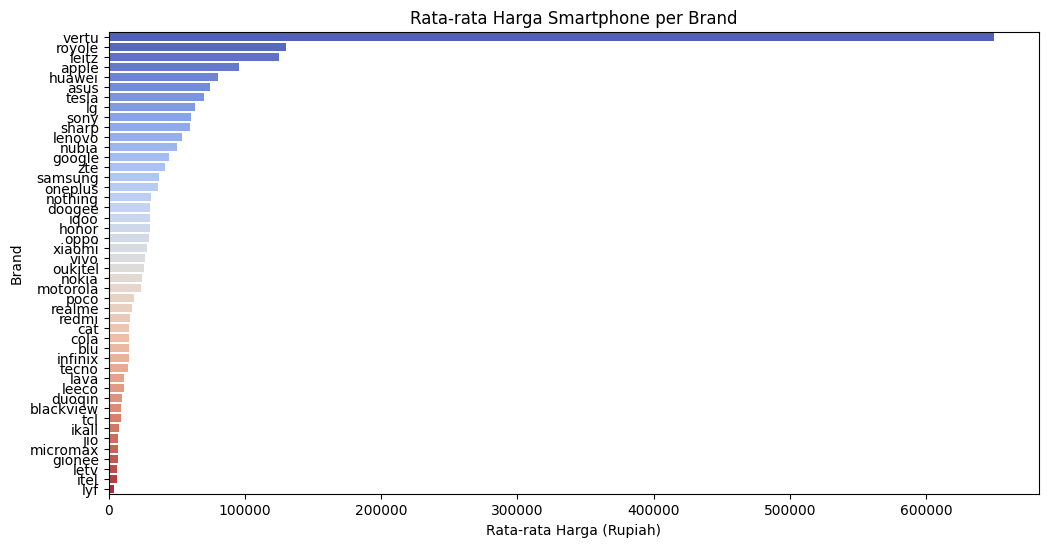

In [32]:
# Distribusi Harga Berdasarkan Brand
plt.figure(figsize=(12, 6))
avg_price = df.groupby('brand_name')['price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price.values, y=avg_price.index, palette='coolwarm')
plt.title("Rata-rata Harga Smartphone per Brand")
plt.xlabel("Rata-rata Harga (Rupiah)")
plt.ylabel("Brand")
plt.show()


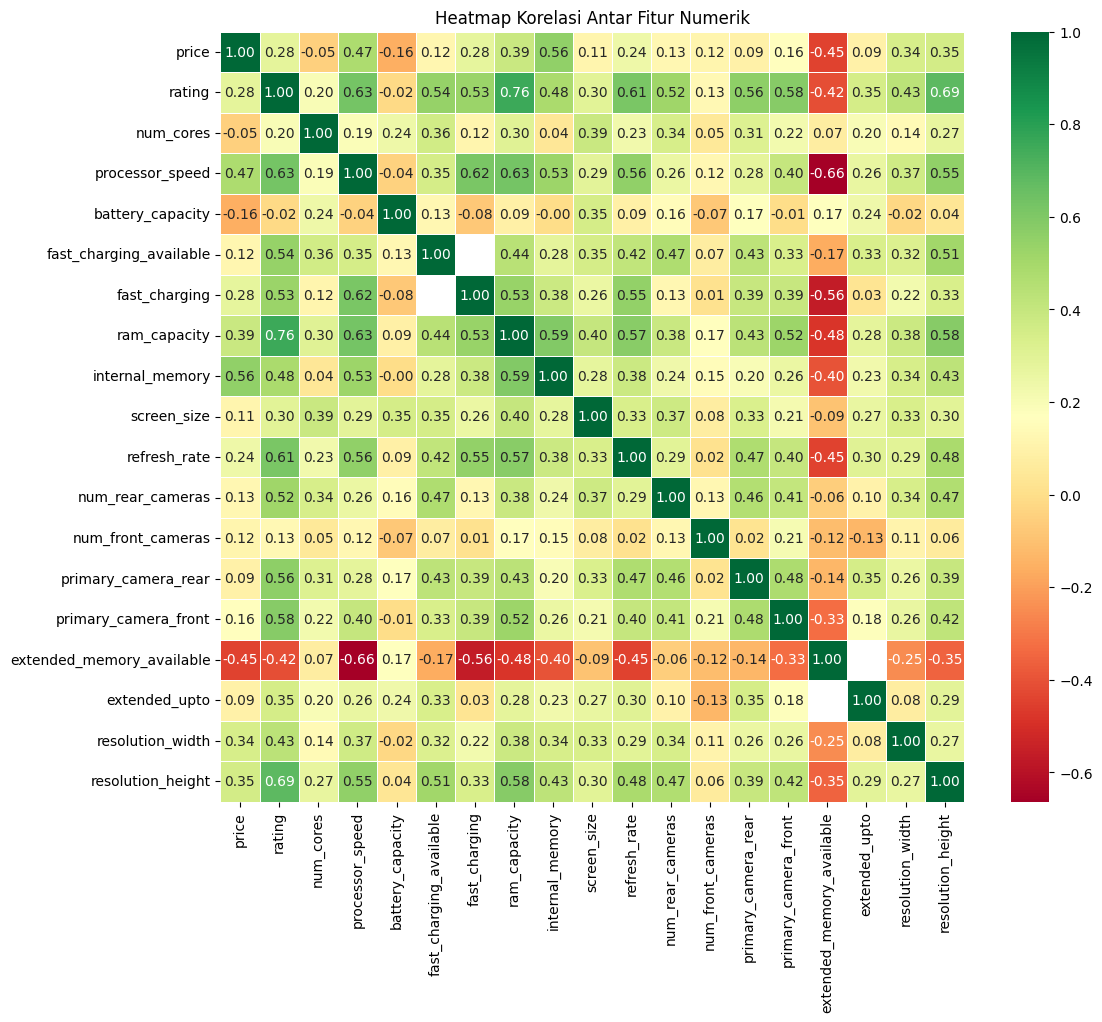

In [33]:
# Korelasi fitur numerik
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdYlGn', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()


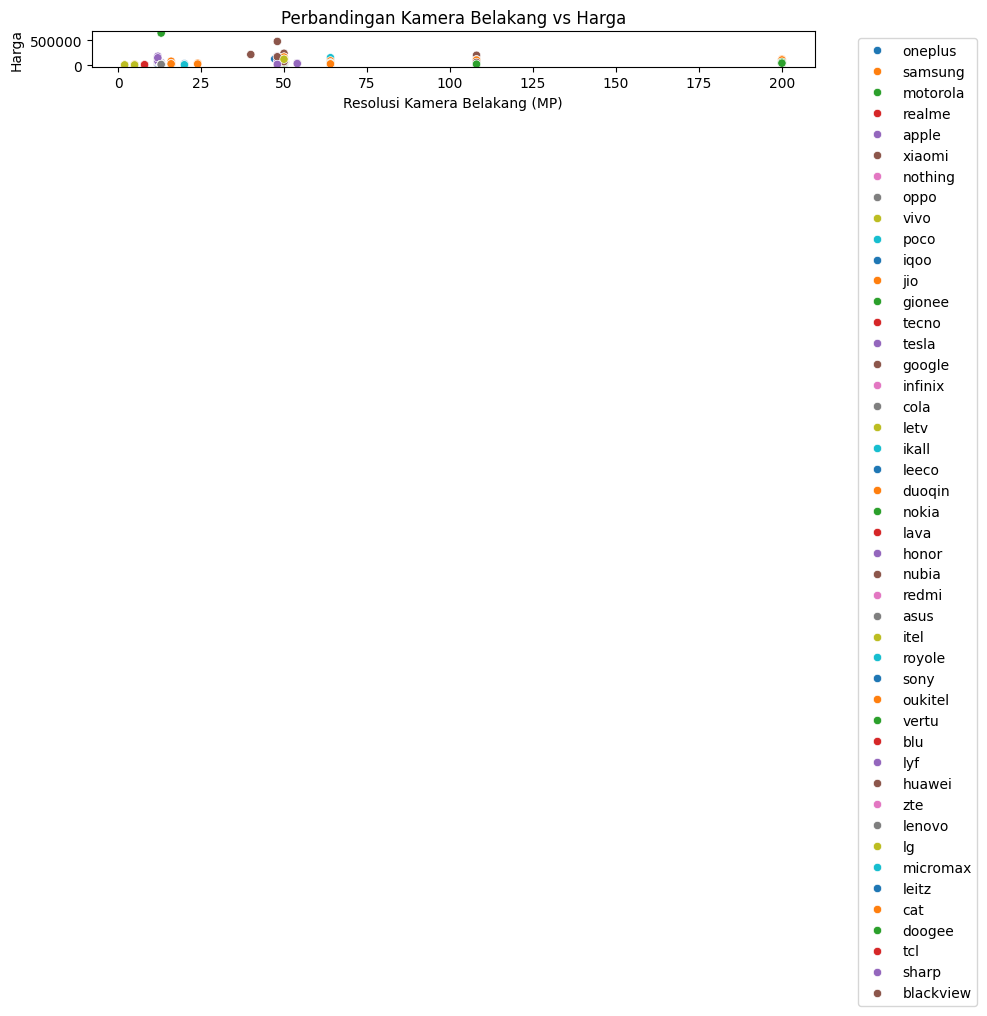

In [34]:
# Perbandingan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='primary_camera_rear', y='price', hue='brand_name', palette='tab10')
plt.title("Perbandingan Kamera Belakang vs Harga")
plt.xlabel("Resolusi Kamera Belakang (MP)")
plt.ylabel("Harga")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


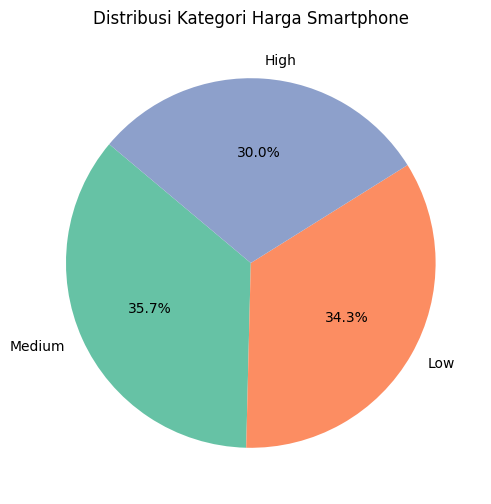

In [35]:
# Pie chart distribusi kategori harga
plt.figure(figsize=(6, 6))
df['price_category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66c2a5','#fc8d62','#8da0cb'], startangle=140)
plt.title("Distribusi Kategori Harga Smartphone")
plt.ylabel("")
plt.show()


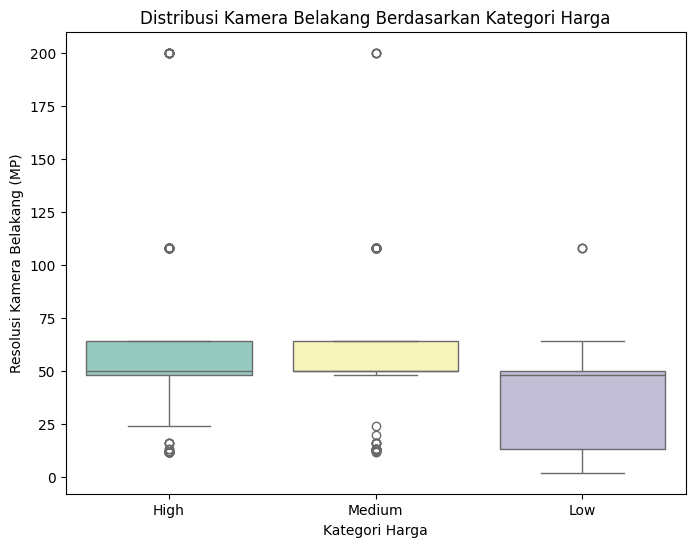

In [36]:
# Boxplot Kamera vs Kategori Harga
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='price_category', y='primary_camera_rear', palette='Set3')
plt.title("Distribusi Kamera Belakang Berdasarkan Kategori Harga")
plt.xlabel("Kategori Harga")
plt.ylabel("Resolusi Kamera Belakang (MP)")
plt.show()


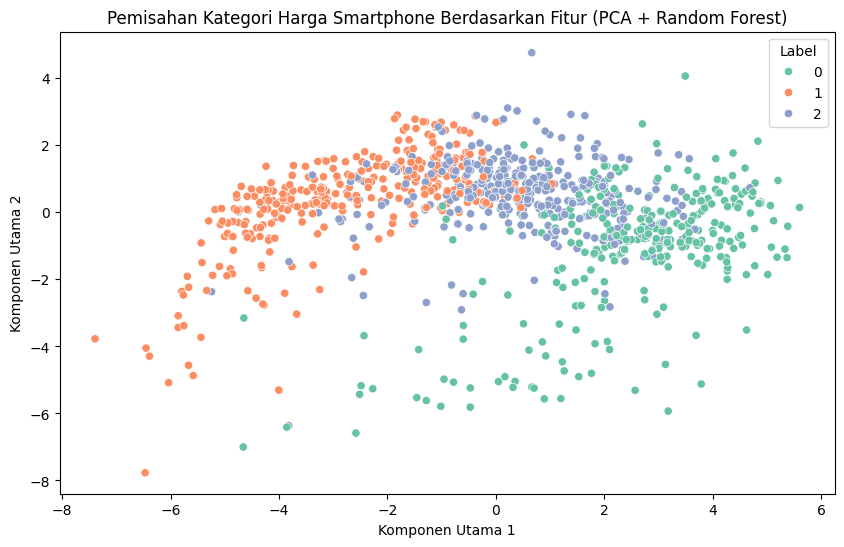

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Label': y
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Label', palette='Set2')
plt.title("Pemisahan Kategori Harga Smartphone Berdasarkan Fitur (PCA + Random Forest)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.show()


**KESIMPULAN**

Dalam penelitian ini, saya menggunakan algoritma Random Forest untuk menganalisis faktor-faktor yang memengaruhi harga smartphone berdasarkan data spesifikasi teknis dan fitur perangkat. Berdasarkan klasifikasi harga yang dibagi ke dalam tiga kategori — Low, Medium, dan High — model berhasil mempelajari pola dari masing-masing kelompok dengan akurasi yang cukup tinggi.

Dari hasil visualisasi dan analisis, ditemukan bahwa beberapa fitur memiliki pengaruh signifikan terhadap harga smartphone. Fitur-fitur utama yang menentukan harga antara lain adalah merek smartphone, jumlah dan resolusi kamera, kecepatan prosesor, serta fitur pendukung seperti 5G, NFC, dan refresh rate layar. Fitur-fitur ini tidak hanya berhubungan langsung dengan performa perangkat, tetapi juga menjadi nilai jual utama dalam pemasaran.

Visualisasi pohon keputusan dari model Random Forest menunjukkan bagaimana model memprioritaskan kombinasi fitur tertentu dalam mengambil keputusan klasifikasi. Sementara itu, visualisasi ruang fitur dalam dua dimensi (PCA) memberikan gambaran bahwa data dari masing-masing kategori harga memiliki pemisahan yang cukup jelas, mengindikasikan bahwa model mampu mengenali karakteristik khas dari tiap kelompok harga.

Secara keseluruhan, algoritma Random Forest terbukti efektif dalam mengenali dan mengevaluasi faktor-faktor penentu harga smartphone. Pendekatan ini dapat diterapkan dalam konteks komersial, seperti penetapan harga yang lebih akurat, rekomendasi produk kepada konsumen, serta analisis persaingan pasar dalam industri smartphone.